#**Sentiment Analysis**
##Using NLP and machine learning alogrithms



In [9]:
!pip install kaggle

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle


In [11]:
!kaggle datasets download -d septa97/100k-courseras-course-reviews-dataset

 41% 5.00M/12.2M [00:00<00:00, 44.9MB/s]
100% 12.2M/12.2M [00:00<00:00, 76.6MB/s]


In [12]:
!unzip '/content/100k-courseras-course-reviews-dataset.zip'


Archive:  /content/100k-courseras-course-reviews-dataset.zip
  inflating: reviews.csv             
  inflating: reviews_by_course.csv   


In [13]:
!pip install nltk

In [14]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re

In [15]:
# reading the csv file
coursera = pd.read_csv('/content/reviews_by_course.csv')

In [16]:
# first 5 rows
coursera.head()

,CourseId,Review,Label
0,2-speed-it,BOring,1
1,2-speed-it,Bravo !,5
2,2-speed-it,Very goo,5
3,2-speed-it,"Great course - I recommend it for all, especia...",5
4,2-speed-it,One of the most useful course on IT Management!,5


In [17]:
# last 5 rows
coursera.tail()

,CourseId,Review,Label
140315,zika,Trendy topic with talks from expertises in the...,4
140316,zika,"Wonderful! Simple and clear language, good ins...",5
140317,zika,an interesting and fun course. thanks. dr quincy,5
140318,zika,"very broad perspective, up to date information...",4
140319,zika,An informative course on the social and financ...,4


In [18]:
# size of the dataset
coursera.shape

(140320, 3)

In [19]:
# column names
coursera.columns

Index(['CourseId', 'Review', 'Label'], dtype='object')

In [20]:
# datatype of columns
coursera.dtypes

CourseId    object
Review      object
Label        int64
dtype: object

In [21]:
# summary of the dataset
coursera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140320 entries, 0 to 140319
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   CourseId  140320 non-null  object
 1   Review    140317 non-null  object
 2   Label     140320 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.2+ MB


In [22]:
# checking for missing values
coursera.isnull().sum()

CourseId    0
Review      3
Label       0
dtype: int64

In [23]:
# finding those 3 empty review columns
missing_rows = coursera["Review"].isnull()
coursera[missing_rows]

,CourseId,Review,Label
50295,html,NaN,1
60579,iot,NaN,5
100717,producing-music,NaN,5


In [24]:
# removing the 3 empty values
coursera.drop([50295,60579,100717],inplace=True)

In [25]:
coursera["Review"].isnull().sum()

0

In [26]:
# other review file
reviews = pd.read_csv('/content/reviews.csv')
reviews.head()

,Id,Review,Label
0,0,good and interesting,5
1,1,"This class is very helpful to me. Currently, I...",5
2,2,like!Prof and TAs are helpful and the discussi...,5
3,3,Easy to follow and includes a lot basic and im...,5
4,4,Really nice teacher!I could got the point eazl...,4


In [27]:
# label part
coursera["Label"].value_counts()

Label
5    106514
4     22460
3      5923
1      2866
2      2554
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7948d10be2f0>,
 [Text(-0.7997225241366082, 0.7552773559352699, 'Very Positive'),
  Text(0.5843153182296179, -0.9319740387383226, 'Positive'),
  Text(1.0234330700193763, -0.40321799462662206, 'Neutral'),
  Text(1.0825160361789283, -0.19534336798432997, 'Negative'),
  Text(1.0982021082928584, -0.0628659632958967, 'Very Negative')],
 [Text(-0.4362122858926953, 0.41196946687378355, '76%'),
  Text(0.3187174463070643, -0.5083494756754486, '16%'),
  Text(0.5582362200105688, -0.21993708797815745, '4%'),
  Text(0.5904632924612335, -0.1065509279914527, '2%'),
  Text(0.5990193317961046, -0.034290525434125474, '2%')])

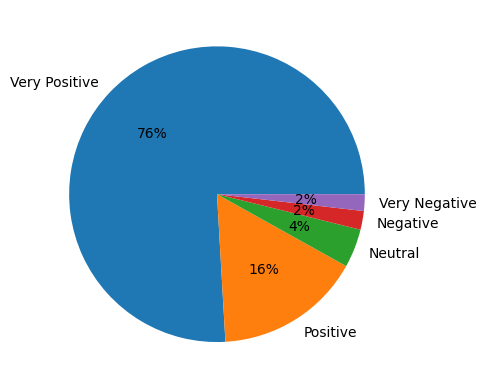

In [28]:
# visualizing using pie count
sizes = coursera["Label"].value_counts()
label = ["Very Positive","Positive","Neutral","Negative","Very Negative"]
plt.pie(sizes,labels=label,autopct="%.f%%")

<BarContainer object of 5 artists>

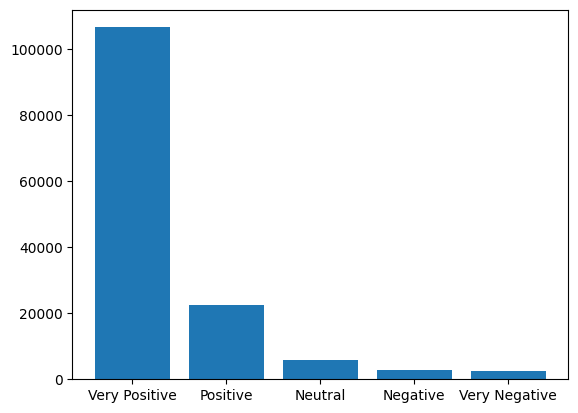

In [29]:
sizes = coursera["Label"].value_counts()
label = ["Very Positive","Positive","Neutral","Negative","Very Negative"]
plt.bar(label,sizes)


In [30]:
# dividing the ratings into positve negative and netural
def rating(rating):
  if rating>3:
    return "Positive"
  elif rating==3:
    return "Neutral"
  else:
    return "Negative"

In [31]:
coursera["Rating"] = coursera["Label"].apply(rating)
coursera.loc[:,["Rating","Label"]]

,Rating,Label
0,Negative,1
1,Positive,5
2,Positive,5
3,Positive,5
4,Positive,5
...,...,...
140315,Positive,4
140316,Positive,5
140317,Positive,5
140318,Positive,4


In [32]:
# checking it is working properly or not by applying filter
rating = coursera["Label"]<3
coursera.loc[rating,["Rating","Label"]]

,Rating,Label
0,Negative,1
18,Negative,2
34,Negative,1
94,Negative,1
117,Negative,2
...,...,...
140277,Negative,1
140279,Negative,1
140281,Negative,1
140294,Negative,1


In [33]:
coursera["Rating"].value_counts()

Rating
Positive    128974
Neutral       5923
Negative      5420
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7948d475dc60>,
 [Text(-1.064717267939617, 0.2763641426654293, 'Positive'),
  Text(1.0234330322673786, -0.4032180904473397, 'Neutral'),
  Text(1.0919107687479788, -0.1331573245908706, 'Negative')],
 [Text(-0.5807548734216093, 0.15074407781750687, '92%'),
  Text(0.5582361994185701, -0.21993714024400343, '4%'),
  Text(0.5955876920443519, -0.07263126795865668, '4%')])

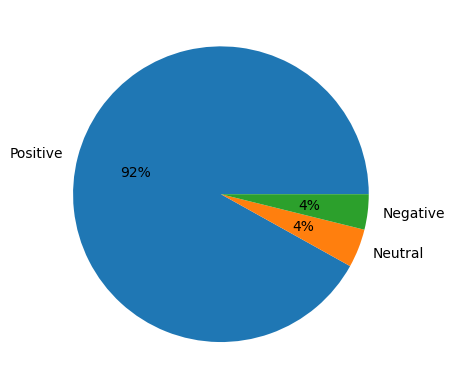

In [34]:
# again checking with graph
sizes= coursera["Rating"].value_counts()
label= ['Positive','Neutral','Negative', ]
plt.pie(sizes,labels=label, autopct ="%.f%%")

In [35]:
from textblob import TextBlob

In [36]:
'''blob = TextBlob(text)
sentiment = blob.sentiment.polarity'''

'blob = TextBlob(text)\nsentiment = blob.sentiment.polarity'

In [37]:
review = coursera["Label"]==3
coursera.loc[review,["Review","Label","Rating"]]

,Review,Label,Rating
5,I was disappointed because the name is mislead...,3,Neutral
12,"Good content, but the course setting does (at ...",3,Neutral
20,"The course content is quite good, though it co...",3,Neutral
93,I'll start by saying that this course gives a ...,3,Neutral
97,It should be merged with course 1,3,Neutral
...,...,...,...
140047,The course addresses quite precisely and pragm...,3,Neutral
140068,内容太空泛，习题不够配合课程。概述性太强，启发性太差。时间上可以压缩掉很多。,3,Neutral
140114,教师与学生互动不多,3,Neutral
140212,課程影片中的面試題和作業對準備面試有一定幫助，讓學生可以提早思考、適應面試時的情況。唯影片中...,3,Neutral


In [38]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=e706f9ff845dc50f2b93edbc88605e31732a54bfb1fe6bc6f412fa333631c9dd
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [39]:
coursera["Review"].tail()

140315    Trendy topic with talks from expertises in the...
140316    Wonderful! Simple and clear language, good ins...
140317     an interesting and fun course. thanks. dr quincy
140318    very broad perspective, up to date information...
140319    An informative course on the social and financ...
Name: Review, dtype: object

In [40]:
!pip install langdetect
import langdetect

In [41]:
# how to find values that are in other languages
from langdetect import detect

In [42]:
coursera["Language"]= coursera["Review"].apply(len)
coursera["Language"]

0           6
1           7
2           8
3          75
4          47
         ... 
140315     94
140316     86
140317     48
140318    144
140319    136
Name: Language, Length: 140317, dtype: int64

In [43]:
def detect(text):
    try:
        return langdetect.detect(text)
    except langdetect.LangDetectException:
        return "Unknown"

In [45]:
coursera["Language"] = coursera["Review"].apply(detect)


In [46]:
coursera["Language"]


0         tl
1         sk
2         af
3         en
4         en
          ..
140315    en
140316    en
140317    en
140318    en
140319    en
Name: Language, Length: 140317, dtype: object

In [47]:
coursera.head(20)

,CourseId,Review,Label,Rating,Language
0,2-speed-it,BOring,1,Negative,tl
1,2-speed-it,Bravo !,5,Positive,sk
2,2-speed-it,Very goo,5,Positive,af
3,2-speed-it,"Great course - I recommend it for all, especia...",5,Positive,en
4,2-speed-it,One of the most useful course on IT Management!,5,Positive,en
5,2-speed-it,I was disappointed because the name is mislead...,3,Neutral,en
6,2-speed-it,Super content. I'll definitely re-do the course,5,Positive,en
7,2-speed-it,Etant contrôleur de gestion pour le départemen...,5,Positive,fr
8,2-speed-it,One of the excellent courses at Coursera for i...,5,Positive,en
9,2-speed-it,Is there any reason why you should not apply t...,5,Positive,en


In [48]:
coursera["Language"].dtype

dtype('O')

In [49]:
coursera["Language"].unique()

array(['tl', 'sk', 'af', 'en', 'fr', 'ca', 'zh-cn', 'zh-tw', 'ko', 'ru',
       'mk', 'bg', 'so', 'da', 'pt', 'pl', 'ro', 'es', 'id', 'no', 'it',
       'sw', 'hr', 'Unknown', 'de', 'tr', 'nl', 'cy', 'cs', 'sl', 'vi',
       'sv', 'fi', 'et', 'uk', 'hu', 'sq', 'lt', 'ar', 'he', 'fa', 'lv',
       'ur', 'ja', 'el'], dtype=object)

In [50]:
coursera["Language"].value_counts()

Language
en         106817
es          12266
fr           3615
zh-cn        2336
pt           2258
ro           2098
ca           2006
af           1534
ru           1531
so            978
de            784
it            558
no            398
tl            335
ko            328
cy            261
sw            246
id            213
Unknown       206
nl            193
vi            179
pl            168
sl            165
da            142
cs             86
et             82
sk             79
sq             75
tr             48
zh-tw          47
sv             46
fi             43
hr             36
hu             33
bg             31
lt             28
uk             15
mk             14
he             11
ar             10
lv             10
fa              4
ja              2
ur              1
el              1
Name: count, dtype: int64

In [51]:
lang=coursera["Language"] != "en"
coursera[lang]

,CourseId,Review,Label,Rating,Language
0,2-speed-it,BOring,1,Negative,tl
1,2-speed-it,Bravo !,5,Positive,sk
2,2-speed-it,Very goo,5,Positive,af
7,2-speed-it,Etant contrôleur de gestion pour le départemen...,5,Positive,fr
14,2-speed-it,Excellent !!!,5,Positive,ca
...,...,...,...,...,...
140309,zika,Excelente curso,5,Positive,ro
140310,zika,Muito bom e confiável.,5,Positive,pt
140311,zika,Fantastic!,5,Positive,ca
140312,zika,"Muito bom o curso, feito perfeitamente com pro...",5,Positive,pt


In [52]:
# saving the dataframe
coursera.to_csv('reveiws_01.csv', header=True, index=True)


In [75]:
coursera =pd.read_csv('/content/reveiws_01.csv')

In [76]:
coursera.head()

,Unnamed: 0,CourseId,Review,Label,Rating,Language
0,0,2-speed-it,BOring,1,Negative,tl
1,1,2-speed-it,Bravo !,5,Positive,sk
2,2,2-speed-it,Very goo,5,Positive,af
3,3,2-speed-it,"Great course - I recommend it for all, especia...",5,Positive,en
4,4,2-speed-it,One of the most useful course on IT Management!,5,Positive,en


In [77]:
unknown =coursera["Language"]== "Unknown"
coursera.loc[unknown]

,Unnamed: 0,CourseId,Review,Label,Rating,Language
284,284,a-programar,:),5,Positive,Unknown
301,301,a-programar,:),5,Positive,Unknown
450,450,a-programar,.,5,Positive,Unknown
513,513,a-programar,:),5,Positive,Unknown
1545,1545,advanced-calculus,...,5,Positive,Unknown
...,...,...,...,...,...,...
135261,135264,web-application-development,.,3,Neutral,Unknown
136029,136032,web-frameworks,100%,5,Positive,Unknown
136550,136553,website-coding,.,4,Positive,Unknown
136578,136581,website-coding,.,4,Positive,Unknown


In [78]:
coursera["Language"].unique()

array(['tl', 'sk', 'af', 'en', 'fr', 'ca', 'zh-cn', 'zh-tw', 'ko', 'ru',
       'mk', 'bg', 'so', 'da', 'pt', 'pl', 'ro', 'es', 'id', 'no', 'it',
       'sw', 'hr', 'Unknown', 'de', 'tr', 'nl', 'cy', 'cs', 'sl', 'vi',
       'sv', 'fi', 'et', 'uk', 'hu', 'sq', 'lt', 'ar', 'he', 'fa', 'lv',
       'ur', 'ja', 'el'], dtype=object)

In [81]:

# install googletrans using pip
!pip install googletrans


In [82]:
import googletrans
from googletrans import Translator

In [83]:

from googletrans import Translator
translator = Translator(service_urls=['translate.google.com'])

#translator = Translator()


In [84]:
def translate(text):
    translated =translator.translate(text, dest='en')
    translated =translated.text
    return translated

In [85]:
coursera["Translate_Text"] = coursera["Review"].apply(translate)

AttributeError: 'Translator' object has no attribute 'raise_Exception'

In [79]:
coursera.drop(coursera.index[coursera.Language == "Unknown"], inplace=True)

In [80]:
unknown =coursera["Language"]== "Unknown"
coursera.loc[unknown]

,Unnamed: 0,CourseId,Review,Label,Rating,Language


In [ ]:
coursera.shape

In [ ]:
coursera["Rating"].value_counts()

In [ ]:
coursera.head()